## Cambridge Property Analysis
### This analysis looks into the property dataset on Cambridge Open Data portal

**Objective:**
The objective for this analysis is to look into lot parcels in Cambridge, MA where accessory dwelling units (ADUs) are possible. Due to changing regulations in the city zoning code, these eligible lots have fluctuated over time, but the main factors are the area of the lot and the interior area of the house/dwelling unit. 


Data from this location: https://data.cambridgema.gov/Assessing/Cambridge-Property-Database-FY16-FY20/eey2-rv59

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns 
import html
from bs4 import BeautifulSoup
import requests

In [35]:
data_address = 'data/Cambridge_Property_Database_FY16-FY20.csv'
df = pd.read_csv(data_address)
df.head(5)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PID,GISID,BldgNum,Address,Unit,StateClassCode,PropertyClass,Zoning,Map/Lot,LandArea,YearOfAssessment,TaxDistrict,ResidentialExemption,BuildingValue,LandValue,AssessedValue,SalePrice,Book/Page,SaleDate,PreviousAssessedValue,Owner_Name,Owner_CoOwnerName,Owner_Location,Owner_Address,Owner_Address2,Owner_City,Owner_State,Owner_Zip,Exterior_Style,Exterior_occupancy,Exterior_NumStories,Exterior_WallType,Exterior_WallHeight,Exterior_RoofType,Exterior_RoofMaterial,Exterior_FloorLocation,Exterior_View,Interior_LivingArea,Interior_NumUnits,Interior_TotalRooms,Interior_Bedrooms,Interior_Kitchens,Interior_FullBaths,Interior_HalfBaths,Interior_Fireplaces,Interior_Flooring,Interior_Layout,Interior_LaundryInUnit,Systems_HeatType,Systems_HeatFuel,Systems_CentralAir,Systems_Plumbing,Condition_YearBuilt,Condition_InteriorCondition,Condition_OverallCondition,Condition_OverallGrade,Parking_Open,Parking_Covered,Parking_Garage,UnfinishedBasementGross,FinishedBasementGross,PropertyTaxAmount
0,7168,111-31,1,"258 Hampshire St\nCambridge, MA\n(42.374295021...",258/3,102,CONDOMINIUM,NaN,111-31-258/3,0.0,2017,R3,1,496600.0,0.0,496600.0,169625.0,29859/ 340,03/01/1999,444600.0,"SARNI, GAIL",NaN,"258 HAMPSHIRE ST #3\nCAMBRIDGE, MA 2139\n(42.3...",258 HAMPSHIRE ST #3,NaN,CAMBRIDGE,MA,2139,NaN,NaN,1.00,NaN,NaN,NaN,NaN,3.0,Average,950.0,NaN,4.0,2.0,Pull Alcove,1.0,0.0,0.0,Hardwood,Thru Unit,1,Hot Water,NaN,NaN,NaN,2000.0,NaN,Good,Average,0.0,0.0,0.0,0.0,0.0,NaN
1,186387,82-107,1,"303-315 Elm St\nCambridge, MA\n(42.373801938, ...",303/2,102,CONDOMINIUM,NaN,82-107-303/2,0.0,2019,R2,0,430400.0,0.0,430400.0,245500.0,44882/ 306,03/28/2005,392400.0,"BERGER, COLBY S.",NaN,"303-315 ELM ST. UNIT#303/2\nCAMBRIDGE, MA 0213...",303-315 ELM ST. UNIT#303/2,NaN,CAMBRIDGE,MA,02139,NaN,NaN,1.00,NaN,NaN,NaN,NaN,2.0,Average,702.0,NaN,4.0,2.0,Full Eat In,1.0,0.0,0.0,Hardwood,Thru Unit,0,Hot Water,NaN,NaN,NaN,1915.0,NaN,Average,Average,1.0,0.0,0.0,0.0,0.0,2615.46
2,20135,236-130,1,"87 Lakeview Ave\nCambridge, MA\n(42.379001088,...",NaN,104,TWO-FAM-RES,A-1,236-130,8105.0,2016,R10,1,588200.0,1414300.0,2002500.0,1560000.0,54690/ 407,NaN,1846500.0,"SWEENEY, ANN & MARTIN CASSIDY",NaN,"87 LAKEVIEW AVE\nCAMBRIDGE, MA 2138\n(42.37900...",87 LAKEVIEW AVE,NaN,CAMBRIDGE,MA,2138,VICTORIAN,TWO-FAM-RES,2.75,Frame-Clapbrd,NaN,Mansard,Slate Clay,NaN,NaN,4081.0,2.0,12.0,6.0,2,3.0,2.0,0.0,NaN,NaN,NaN,Forced Air,Gas,0,NaN,1872.0,Fair,Fair,Good Very Good,3.0,0.0,NaN,1282.0,0.0,NaN
3,18143,215-8,1,"15 Concord Ave\nCambridge, MA\n(42.378861561, ...",7,102,CONDOMINIUM,NaN,215-8-7,0.0,2018,R6,0,182600.0,0.0,182600.0,135000.0,59980/ 93,09/12/2012,169700.0,"FINNERTY, JAMES & LINDA FINNERTY, TRS",CONCORD HARVARD REALTY TRUST,"78 COLLEGE RD\nCONCORD, MA 1742\n(42.473910352...",78 COLLEGE RD,NaN,CONCORD,MA,1742,OTHER,NaN,1.00,NaN,NaN,NaN,NaN,3.0,Average,227.0,NaN,1.0,1.0,None,1.0,0.0,0.0,Hardwood,No Impact,0,Hot Water,NaN,NaN,NaN,1890.0,NaN,Good,Average,0.0,0.0,0.0,0.0,0.0,NaN
4,12672,161-73,1,"25 Dewolfe St\nCambridge, MA\n(42.369989135, -...",NaN,942,"Private College, University",C-3,161-73,55669.0,2019,C7,0,19061600.0,7114600.0,26176200.0,0.0,/,01/01/1900,24507600.0,PRESIDENT & FELLOWS OF HARVARD COLLEGE,"C/O HARVARD REAL ESTATE, INC.","HOLYOKE CENTER,ROOM 1000\nCAMBRIDGE, MA 02138-...","HOLYOKE CENTER,ROOM 1000",1350 MASSACHUSETTS AVE,CAMBRIDGE,MA,02138-3895,MULT-RESDNCE,SNGL-FAM-RES,5.00,Brick,NaN,Gable,Slate Clay,NaN,NaN,62061.0,0.0,0.0,0.0,0,40.0,0.0,0.0,NaN,NaN,NaN,Hot Water,Gas,0,NaN,1920.0,Good,Good,Excellent,0.0,0.0,NaN,15516.0,0.0,0.00


In [36]:
len(df)

145108

In [38]:
df.LandArea.describe()

count    1.440520e+05
mean     1.247368e+04
std      1.144677e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.300000e+03
max      7.251433e+06
Name: LandArea, dtype: float64

In [62]:
ADU_possible_zones = ['A-1','A-2','B','C','C-1','C-1A','C-2','C-2A','C-2B','C-3']
ADU_zones = ['A-1','A-2','B','C','C-1']

In [42]:
df[df['Zoning'].isin(ADU_possible_zones)].groupby(['Zoning']).mean()

,PID,BldgNum,StateClassCode,LandArea,YearOfAssessment,BuildingValue,LandValue,AssessedValue,SalePrice,PreviousAssessedValue,Exterior_NumStories,Exterior_WallHeight,Exterior_FloorLocation,Interior_LivingArea,Interior_NumUnits,Interior_TotalRooms,Interior_Bedrooms,Interior_FullBaths,Interior_HalfBaths,Interior_Fireplaces,Condition_YearBuilt,Parking_Open,Parking_Covered,Parking_Garage,UnfinishedBasementGross,FinishedBasementGross,PropertyTaxAmount
Zoning,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-1,20985.713730,1.033352,349.383546,14782.035019,2018.005003,1.635873e+06,1.977930e+06,3.613803e+06,1.321664e+06,3.318151e+06,2.306900,13.463415,1.000000,4151.295492,36.164897,10.328214,4.824601,3.220387,1.059795,2.985763,1740.486923,2.006264,0.978360,0.000000,1231.292154,358.725825,22489.249321
A-2,19719.503525,1.300529,548.833725,25030.373678,2018.027027,1.879834e+06,1.903197e+06,3.783031e+06,7.868726e+05,3.485738e+06,2.135944,11.606061,NaN,3536.907385,132.893361,8.802870,4.068038,2.625949,0.907911,1.905063,1762.590530,1.588924,0.751266,NaN,1023.078618,351.109794,14253.787540
B,18143.049642,1.050501,181.221002,5909.678091,2018.004010,6.044300e+05,5.727611e+05,1.177191e+06,4.361927e+05,1.059491e+06,1.839867,11.624881,1.420690,2243.368411,26.525915,7.475800,3.250995,1.789050,0.333703,0.383066,1508.867789,1.162998,0.313857,0.490411,900.647757,162.325225,7135.765707
C,7047.188205,1.056206,210.123270,4652.142006,2018.003406,4.677938e+05,5.108712e+05,9.786650e+05,3.186094e+05,8.837859e+05,1.697049,11.346809,1.929825,2243.174515,11.869555,6.839603,3.050675,1.574236,0.246034,0.155577,1392.643938,0.854843,0.207199,0.044776,1003.191988,164.975396,6001.862703
C-1,8390.927308,1.191852,236.282865,8845.889484,2018.005319,9.417033e+05,7.702934e+05,1.711962e+06,5.371608e+05,1.549747e+06,1.854258,11.275761,2.120000,2859.766094,25.005806,6.812149,3.029186,1.646410,0.239377,0.179696,1457.400919,0.832737,0.158145,0.244681,961.631121,150.523590,8208.886568
C-1A,23427.370607,1.271565,271.477636,16969.046326,2017.996805,4.638677e+05,2.142807e+05,6.781484e+05,9.981429e+05,6.158181e+05,1.367412,11.522222,1.215686,1576.041534,0.814016,3.692164,1.785448,1.093284,0.248134,0.149254,1352.667732,0.354478,0.054104,0.541176,410.178914,96.606343,5324.294360
C-2,15603.538585,1.451768,488.720257,47669.987942,2018.086817,9.713883e+06,6.514893e+06,1.622878e+07,8.161145e+05,1.483914e+07,2.174107,11.229885,2.400000,16126.099490,3758.622307,3.822545,1.514493,1.132850,0.157005,0.408213,1586.961735,0.164251,0.077295,0.076923,1180.817177,588.193080,23479.295646
C-2A,22518.434028,1.416667,475.944444,17788.572917,2018.215278,3.372667e+06,2.380178e+06,5.752844e+06,6.104067e+05,5.151195e+06,2.425926,10.738095,NaN,10798.818930,2130.142361,5.228395,1.717949,0.871795,0.282051,0.341880,1375.925926,0.000000,0.170940,NaN,1540.720165,415.882716,25078.832424
C-2B,7843.855478,1.139860,352.741259,19499.703963,2018.006993,3.661120e+06,2.592341e+06,6.253462e+06,3.342965e+06,5.667367e+06,2.290398,11.974359,3.500000,13041.887588,326.587112,2.071795,0.932642,0.518135,0.077720,0.000000,1385.210773,0.155440,0.000000,0.000000,1459.744731,169.666667,49862.900988


In [55]:
ADU_zones = df[df['Zoning'].isin(ADU_possible_zones)]
ADU_zones['PID'].groupby(AUD_zones['Zoning']).count()

Zoning
A-1      1799
A-2      3404
B       20950
C        4697
C-1     27073
C-1A      626
C-2      1244
C-2A      288
C-2B      429
C-3      1063
Name: PID, dtype: int64

In [57]:
ADU_zones.head()

,PID,GISID,BldgNum,Address,Unit,StateClassCode,PropertyClass,Zoning,Map/Lot,LandArea,YearOfAssessment,TaxDistrict,ResidentialExemption,BuildingValue,LandValue,AssessedValue,SalePrice,Book/Page,SaleDate,PreviousAssessedValue,Owner_Name,Owner_CoOwnerName,Owner_Location,Owner_Address,Owner_Address2,Owner_City,Owner_State,Owner_Zip,Exterior_Style,Exterior_occupancy,Exterior_NumStories,Exterior_WallType,Exterior_WallHeight,Exterior_RoofType,Exterior_RoofMaterial,Exterior_FloorLocation,Exterior_View,Interior_LivingArea,Interior_NumUnits,Interior_TotalRooms,Interior_Bedrooms,Interior_Kitchens,Interior_FullBaths,Interior_HalfBaths,Interior_Fireplaces,Interior_Flooring,Interior_Layout,Interior_LaundryInUnit,Systems_HeatType,Systems_HeatFuel,Systems_CentralAir,Systems_Plumbing,Condition_YearBuilt,Condition_InteriorCondition,Condition_OverallCondition,Condition_OverallGrade,Parking_Open,Parking_Covered,Parking_Garage,UnfinishedBasementGross,FinishedBasementGross,PropertyTaxAmount
2,20135,236-130,1,"87 Lakeview Ave\nCambridge, MA\n(42.379001088,...",NaN,104,TWO-FAM-RES,A-1,236-130,8105.0,2016,R10,1,588200.0,1414300.0,2002500.0,1560000.0,54690/ 407,NaN,1846500.0,"SWEENEY, ANN & MARTIN CASSIDY",NaN,"87 LAKEVIEW AVE\nCAMBRIDGE, MA 2138\n(42.37900...",87 LAKEVIEW AVE,NaN,CAMBRIDGE,MA,2138,VICTORIAN,TWO-FAM-RES,2.75,Frame-Clapbrd,NaN,Mansard,Slate Clay,NaN,NaN,4081.0,2.0,12.0,6.0,2,3.0,2.0,0.0,NaN,NaN,NaN,Forced Air,Gas,0,NaN,1872.0,Fair,Fair,Good Very Good,3.0,0.0,NaN,1282.0,0.0,NaN
4,12672,161-73,1,"25 Dewolfe St\nCambridge, MA\n(42.369989135, -...",NaN,942,"Private College, University",C-3,161-73,55669.0,2019,C7,0,19061600.0,7114600.0,26176200.0,0.0,/,01/01/1900,24507600.0,PRESIDENT & FELLOWS OF HARVARD COLLEGE,"C/O HARVARD REAL ESTATE, INC.","HOLYOKE CENTER,ROOM 1000\nCAMBRIDGE, MA 02138-...","HOLYOKE CENTER,ROOM 1000",1350 MASSACHUSETTS AVE,CAMBRIDGE,MA,02138-3895,MULT-RESDNCE,SNGL-FAM-RES,5.00,Brick,NaN,Gable,Slate Clay,NaN,NaN,62061.0,0.0,0.0,0.0,0,40.0,0.0,0.0,NaN,NaN,NaN,Hot Water,Gas,0,NaN,1920.0,Good,Good,Excellent,0.0,0.0,NaN,15516.0,0.0,0.00
6,20044,235-55,1,"6 Gracewood Pk\nCambridge, MA\n(42.378052737, ...",NaN,101,SNGL-FAM-RES,B,235-55,2911.0,2018,R14,1,279100.0,648900.0,928000.0,1.0,50229/ 427,10/16/2007,898100.0,"HALLEY, MICHAEL R. & SARAH JANE MOSES",NaN,"6 GRACEWOOD PK\nCAMBRIDGE, MA 2138\n(42.378052...",6 GRACEWOOD PK,NaN,CAMBRIDGE,MA,2138,CONVENTIONAL,SNGL-FAM-RES,2.00,Aluminum-Vinyl,NaN,Gable,Slate Clay,NaN,NaN,1458.0,1.0,5.0,2.0,1,2.0,1.0,1.0,NaN,NaN,NaN,Forced Air,Gas,1,NaN,1916.0,Average,Average,Average,0.0,0.0,NaN,714.0,0.0,NaN
9,9984,127-107,1,"17 Rockwell St\nCambridge, MA\n(42.362614289, ...",NaN,101,SNGL-FAM-RES,C,127-107,3269.0,2019,R12,1,733600.0,774900.0,1508500.0,435000.0,49840/ 8,07/26/2007,1385300.0,"NELSON, SARA & GABRIEL BELFORT",NaN,"17 ROCKWELL ST.\nCAMBRIDGE, MA 02139\n(42.3626...",17 ROCKWELL ST.,NaN,CAMBRIDGE,MA,02139,CONVENTIONAL,SNGL-FAM-RES,2.75,Wood Shingle,NaN,Gable,Wood Shingle,NaN,NaN,1703.0,1.0,7.0,3.0,1,2.0,1.0,0.0,NaN,NaN,NaN,Forced Air,Gas,1,NaN,2008.0,Excellent,Excellent,Good,2.0,0.0,NaN,636.0,0.0,9211.48
10,10031,127-155,1,"113R Pleasant St\nCambridge, MA\n(42.361254776...",NaN,101,SNGL-FAM-RES,C-1,127-155,1053.0,2017,R12,1,34600.0,438800.0,473400.0,92000.0,24269/ 594,02/25/1994,378400.0,"ALU, TINA M.",NaN,"113 1/2 PLEASANT ST\nCAMBRIDGE, MA 2139\n(42.3...",113 1/2 PLEASANT ST,NaN,CAMBRIDGE,MA,2139,CONVENTIONAL,SNGL-FAM-RES,1.00,Frame-Clapbrd,NaN,Aspahlt Shingl,Aspahlt Shingl,NaN,NaN,436.0,1.0,3.0,1.0,1,1.0,0.0,0.0,NaN,NaN,NaN,Other,Electric,0,NaN,1886.0,Fair,Fair,Poor,0.0,0.0,NaN,420.0,0.0,NaN


In [17]:
df[df['zoning'].isin(ADU_possible_zones)].mean()

assessedvalue              6.690057e+06
bldgnum                    1.157385e+00
buildingvalue              4.435006e+06
condition_yearbuilt        1.478096e+03
exterior_floorlocation     2.473684e+00
exterior_numstories        1.888547e+00
exterior_wallheight        1.202083e+01
finishedbasementgross      2.767068e+02
interior_bedrooms          2.969274e+00
interior_fireplaces        4.245810e-01
interior_fullbaths         1.846369e+00
interior_halfbaths         3.240223e-01
interior_laundryinunit     6.842105e-01
interior_livingarea        3.818690e+03
interior_numunits          1.163921e+03
interior_totalrooms        6.687671e+00
landarea                   2.056473e+04
landvalue                  2.255050e+06
parking_covered            2.653631e-01
parking_garage             3.684211e-01
parking_open               9.413408e-01
pid                        1.382508e+04
previousassessedvalue      6.275746e+06
propertytaxamount          3.389429e+04
residentialexemption                inf


In [113]:
# Want to filter for property classes 
Good_classes = ['SNGL-FAM-RES','TWO-FAM-RES','SINGLE FAM W/AUXILIARY APT']

ADU_zones_small = df[df['Zoning'].isin(ADU_zones)]
ADU_zones_small_final=ADU_zones_small[ADU_zones_small['Zoning'].isin(ADU_zones)]



In [119]:
ADU_zones_small_final=ADU_zones_small_final.dropna(subset=['Interior_LivingArea','LandArea'])

In [120]:
ADU_zones_small_final['FAR']=ADU_zones_small_final['Interior_LivingArea']/ADU_zones_small_final['LandArea']
ADU_zones_small_final.describe()


,PID,BldgNum,StateClassCode,LandArea,YearOfAssessment,BuildingValue,LandValue,AssessedValue,SalePrice,PreviousAssessedValue,Exterior_NumStories,Exterior_WallHeight,Exterior_FloorLocation,Interior_LivingArea,Interior_NumUnits,Interior_TotalRooms,Interior_Bedrooms,Interior_FullBaths,Interior_HalfBaths,Interior_Fireplaces,Condition_YearBuilt,Parking_Open,Parking_Covered,Parking_Garage,UnfinishedBasementGross,FinishedBasementGross,PropertyTaxAmount,FAR
count,57752.000000,57752.000000,57752.000000,57752.000000,57752.000000,5.775200e+04,5.775200e+04,5.775200e+04,5.775200e+04,5.775200e+04,57752.000000,5838.000000,2395.000000,57752.000000,55267.000000,51914.000000,51914.000000,51914.000000,51914.000000,51914.000000,57752.000000,51914.000000,51914.000000,2485.000000,57752.000000,51914.000000,23184.000000,5.774700e+04
mean,12854.584828,1.130541,232.921717,8542.138264,2018.004762,8.517278e+05,7.768772e+05,1.628589e+06,5.216717e+05,1.476840e+06,1.866736,11.371017,1.881002,2666.086993,1.826099,7.327985,3.239723,1.807952,0.344435,0.455446,1497.323244,1.046558,0.285530,0.288934,954.896263,171.348654,8475.069515,inf
std,14022.315504,0.955530,810.999197,32116.696366,1.415154,2.851024e+06,1.957028e+06,4.582435e+06,6.232370e+06,4.143356e+06,1.129102,2.398331,1.100825,5174.690633,4.367752,5.190539,2.384494,1.337297,0.569926,1.080108,782.377611,1.256796,0.682489,0.534835,992.212830,583.024728,15757.637103,NaN
min,656.000000,1.000000,13.000000,0.000000,2016.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1125.000000,-950.000000,-1.000000,0.000000e+00
25%,5711.000000,1.000000,101.000000,2579.000000,2017.000000,1.826750e+05,1.680000e+05,5.389000e+05,1.000000e+00,4.863750e+05,1.000000,10.000000,1.000000,948.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1854.000000,0.000000,0.000000,0.000000,400.000000,0.000000,2385.852500,2.347155e-01
50%,12118.000000,1.000000,104.000000,3999.000000,2018.000000,4.558000e+05,5.511000e+05,1.021300e+06,9.000000e+04,9.198000e+05,2.250000,12.000000,2.000000,2077.000000,1.000000,8.000000,3.000000,2.000000,0.000000,0.000000,1894.000000,1.000000,0.000000,0.000000,932.000000,0.000000,6962.220000,5.613459e-01
75%,18343.000000,1.000000,199.000000,5962.000000,2019.000000,7.580000e+05,8.135000e+05,1.531550e+06,5.550000e+05,1.383000e+06,2.750000,12.000000,3.000000,3124.000000,2.000000,11.000000,5.000000,3.000000,1.000000,0.000000,1916.000000,2.000000,0.000000,0.000000,1243.000000,0.000000,10149.100000,8.777910e-01
max,193672.000000,22.000000,9971.000000,507399.000000,2020.000000,5.246990e+07,1.391425e+08,1.471843e+08,1.400000e+09,7.806150e+07,16.000000,35.000000,7.000000,177077.000000,127.000000,30.000000,16.000000,12.000000,10.000000,11.000000,2019.000000,20.000000,7.000000,2.000000,26549.000000,19816.000000,549051.000000,inf


In [121]:
len(ADU_zones_small_final)

57752

In [76]:
new_df = ADU_zones_small.groupby(['Zoning','PropertyClass'])['PID'].count()
new_df.to_csv("data/Property Classes.csv")

In [92]:
import geopandas as gpd

In [99]:
gdf = gpd.read_file('./Assessing Parcels/geo_export_53816f63-7cc9-408d-837f-b1d31c95f446.shp')


In [108]:
ADU_zones_small.head()

,PID,GISID,BldgNum,Address,Unit,StateClassCode,PropertyClass,Zoning,Map/Lot,LandArea,YearOfAssessment,TaxDistrict,ResidentialExemption,BuildingValue,LandValue,AssessedValue,SalePrice,Book/Page,SaleDate,PreviousAssessedValue,Owner_Name,Owner_CoOwnerName,Owner_Location,Owner_Address,Owner_Address2,Owner_City,Owner_State,Owner_Zip,Exterior_Style,Exterior_occupancy,Exterior_NumStories,Exterior_WallType,Exterior_WallHeight,Exterior_RoofType,Exterior_RoofMaterial,Exterior_FloorLocation,Exterior_View,Interior_LivingArea,Interior_NumUnits,Interior_TotalRooms,Interior_Bedrooms,Interior_Kitchens,Interior_FullBaths,Interior_HalfBaths,Interior_Fireplaces,Interior_Flooring,Interior_Layout,Interior_LaundryInUnit,Systems_HeatType,Systems_HeatFuel,Systems_CentralAir,Systems_Plumbing,Condition_YearBuilt,Condition_InteriorCondition,Condition_OverallCondition,Condition_OverallGrade,Parking_Open,Parking_Covered,Parking_Garage,UnfinishedBasementGross,FinishedBasementGross,PropertyTaxAmount
2,20135,236-130,1,"87 Lakeview Ave\nCambridge, MA\n(42.379001088,...",NaN,104,TWO-FAM-RES,A-1,236-130,8105.0,2016,R10,1,588200.0,1414300.0,2002500.0,1560000.0,54690/ 407,NaN,1846500.0,"SWEENEY, ANN & MARTIN CASSIDY",NaN,"87 LAKEVIEW AVE\nCAMBRIDGE, MA 2138\n(42.37900...",87 LAKEVIEW AVE,NaN,CAMBRIDGE,MA,2138,VICTORIAN,TWO-FAM-RES,2.75,Frame-Clapbrd,NaN,Mansard,Slate Clay,NaN,NaN,4081.0,2.0,12.0,6.0,2,3.0,2.0,0.0,NaN,NaN,NaN,Forced Air,Gas,0,NaN,1872.0,Fair,Fair,Good Very Good,3.0,0.0,NaN,1282.0,0.0,NaN
6,20044,235-55,1,"6 Gracewood Pk\nCambridge, MA\n(42.378052737, ...",NaN,101,SNGL-FAM-RES,B,235-55,2911.0,2018,R14,1,279100.0,648900.0,928000.0,1.0,50229/ 427,10/16/2007,898100.0,"HALLEY, MICHAEL R. & SARAH JANE MOSES",NaN,"6 GRACEWOOD PK\nCAMBRIDGE, MA 2138\n(42.378052...",6 GRACEWOOD PK,NaN,CAMBRIDGE,MA,2138,CONVENTIONAL,SNGL-FAM-RES,2.00,Aluminum-Vinyl,NaN,Gable,Slate Clay,NaN,NaN,1458.0,1.0,5.0,2.0,1,2.0,1.0,1.0,NaN,NaN,NaN,Forced Air,Gas,1,NaN,1916.0,Average,Average,Average,0.0,0.0,NaN,714.0,0.0,NaN
9,9984,127-107,1,"17 Rockwell St\nCambridge, MA\n(42.362614289, ...",NaN,101,SNGL-FAM-RES,C,127-107,3269.0,2019,R12,1,733600.0,774900.0,1508500.0,435000.0,49840/ 8,07/26/2007,1385300.0,"NELSON, SARA & GABRIEL BELFORT",NaN,"17 ROCKWELL ST.\nCAMBRIDGE, MA 02139\n(42.3626...",17 ROCKWELL ST.,NaN,CAMBRIDGE,MA,02139,CONVENTIONAL,SNGL-FAM-RES,2.75,Wood Shingle,NaN,Gable,Wood Shingle,NaN,NaN,1703.0,1.0,7.0,3.0,1,2.0,1.0,0.0,NaN,NaN,NaN,Forced Air,Gas,1,NaN,2008.0,Excellent,Excellent,Good,2.0,0.0,NaN,636.0,0.0,9211.48
10,10031,127-155,1,"113R Pleasant St\nCambridge, MA\n(42.361254776...",NaN,101,SNGL-FAM-RES,C-1,127-155,1053.0,2017,R12,1,34600.0,438800.0,473400.0,92000.0,24269/ 594,02/25/1994,378400.0,"ALU, TINA M.",NaN,"113 1/2 PLEASANT ST\nCAMBRIDGE, MA 2139\n(42.3...",113 1/2 PLEASANT ST,NaN,CAMBRIDGE,MA,2139,CONVENTIONAL,SNGL-FAM-RES,1.00,Frame-Clapbrd,NaN,Aspahlt Shingl,Aspahlt Shingl,NaN,NaN,436.0,1.0,3.0,1.0,1,1.0,0.0,0.0,NaN,NaN,NaN,Other,Electric,0,NaN,1886.0,Fair,Fair,Poor,0.0,0.0,NaN,420.0,0.0,NaN
11,2140,36-136,1,"25 Warren St\nCambridge, MA\n(42.37281, -71.08...",NaN,111,4-8-UNIT-APT,C-1,36-136,1463.0,2018,C6,0,646400.0,472000.0,1118400.0,1.0,66129/ 389,09/25/2015,1016700.0,25 WARREN STREET LLC,NaN,"25 WARREN ST\nCAMBRIDGE, MA 2141\n(42.37281, -...",25 WARREN ST,NaN,CAMBRIDGE,MA,2141,MULT-RESDNCE,4-8-UNIT-APT,4.00,WOOD-SHN-SHK,10.0,NaN,TAR-GRAVEL,NaN,NaN,5096.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FORCED-AIR,Gas,NaN,FAIR,1900.0,NaN,Average,FAIR,NaN,NaN,NaN,1008.0,NaN,NaN


In [340]:
# Let's load the data from the Json
data_address = 'data/Cambridge_Property_Database_FY2020.csv'
df_fy20 = pd.read_csv(data_address)
df_fy20.head(5)

,PID,GISID,BldgNum,Address,Unit,StateClassCode,PropertyClass,Zoning,Map/Lot,LandArea,YearOfAssessment,TaxDistrict,ResidentialExemption,BuildingValue,LandValue,AssessedValue,SalePrice,Book/Page,SaleDate,PreviousAssessedValue,Owner_Name,Owner_CoOwnerName,Owner_Location,Owner_Address,Owner_Address2,Owner_City,Owner_State,Owner_Zip,Exterior_Style,Exterior_occupancy,Exterior_NumStories,Exterior_WallType,Exterior_WallHeight,Exterior_RoofType,Exterior_RoofMaterial,Exterior_FloorLocation,Exterior_View,Interior_LivingArea,Interior_NumUnits,Interior_TotalRooms,Interior_Bedrooms,Interior_Kitchens,Interior_FullBaths,Interior_HalfBaths,Interior_Fireplaces,Interior_Flooring,Interior_Layout,Interior_LaundryInUnit,Systems_HeatType,Systems_HeatFuel,Systems_CentralAir,Systems_Plumbing,Condition_YearBuilt,Condition_InteriorCondition,Condition_OverallCondition,Condition_OverallGrade,Parking_Open,Parking_Covered,Parking_Garage,UnfinishedBasementGross,FinishedBasementGross,PropertyTaxAmount
0,6019,102-46,1,"116 Magazine St\nCambridge, MA\n(42.3598230000...",NaN,325,RETAIL-STORE,C,102-46,2040,2020,C4,False,398300.0,195800.0,594100.0,490000.0,48878/340,01/23/2007,530500.0,"SPUNT, ERIC S. & KATHRYN K. SPUNT",NaN,"C/O ICUBE LLC\nMARBLEHEAD, MA 01945\n(42.50113...",C/O ICUBE LLC,20 NONANTUM RD,MARBLEHEAD,MA,01945,RETAIL-STORE,RETAIL-STORE,1.00,BRICK,0.0,NaN,TAR-GRAVEL,NaN,NaN,1800,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPACE-HEAT,Oil,NaN,AVERAGE,1931,NaN,Good,GOOD,NaN,NaN,NaN,0,NaN,7759
1,6018,102-45,2,"460-462 Putnam Ave\nCambridge, MA\n(42.3590760...",NaN,109,MULTIPLE-RES,C,102-45,8224,2020,R13,True,885500.0,1314800.0,2200300.0,1.0,70857/472,04/11/2018,1951900.0,"RICE, EDWARD J. &","DIANNE RICE, TRUSTEES","460-462 PUTNAM AVE\nCAMBRIDGE, MA 02139\n(42.3...",460-462 PUTNAM AVE,NaN,CAMBRIDGE,MA,02139,DECKER,MULT-RES-3FAM,3.00,Frame-Clapbrd,NaN,Flat,Tar Gravel,NaN,NaN,4619,3.0,17.0,9.0,3,3.0,0.0,0.0,NaN,NaN,NaN,Hot Water,Gas,False,NaN,1902,Fair,Fair,Good,3.0,0.0,NaN,1399,0.0,13014
2,6018,102-45,1,"460-462 Putnam Ave\nCambridge, MA\n(42.3590760...",NaN,109,MULTIPLE-RES,C,102-45,8224,2020,R13,True,885500.0,1314800.0,2200300.0,1.0,70857/472,04/11/2018,1951900.0,"RICE, EDWARD J. &","DIANNE RICE, TRUSTEES","460-462 PUTNAM AVE\nCAMBRIDGE, MA 02139\n(42.3...",460-462 PUTNAM AVE,NaN,CAMBRIDGE,MA,02139,CONVENTIONAL,MULT-RES-2FAM,2.50,Frame-Clapbrd,NaN,Gable,Aspahlt Shingl,NaN,NaN,2413,2.0,12.0,5.0,2,2.0,0.0,0.0,NaN,NaN,NaN,Steam,Gas,False,NaN,1873,Fair,Fair,Average,0.0,0.0,NaN,1228,0.0,13014
3,6017,102-44,1,"466 Putnam Ave\nCambridge, MA\n(42.35873602100...",NaN,104,TWO-FAM-RES,C,102-44,6624,2020,R13,True,563300.0,995500.0,1558800.0,1.0,66291/56,10/28/2015,1399400.0,"SLAPIKOFF, SAUL, TRUSTEE","GONZALEZ, FLORA, TRUSTEE","466 PUTNAM AVE\nCAMBRIDGE, MA 02139\n(42.35873...",466 PUTNAM AVE,NaN,CAMBRIDGE,MA,02139,OLD STYLE TWO FAM,TWO-FAM-RES,2.75,Aluminum-Vinyl,NaN,Gable,Aspahlt Shingl,NaN,NaN,3070,2.0,11.0,4.0,2,3.0,0.0,0.0,NaN,NaN,NaN,Hot Water,Gas,False,NaN,1893,Average,Average,Average,2.0,2.0,NaN,1111,0.0,9215
4,6016,102-43,1,"472 Putnam Ave\nCambridge, MA\n(42.35863341700...",NaN,111,4-8-UNIT-APT,C,102-43,3508,2020,C4,False,1131700.0,1560000.0,2691700.0,1.0,56430/391,02/07/2011,2424900.0,"PANTAZOPOULOS, MARIA TRUSTEE OF",PUTNAM AVENUE TRUST,"229 PEARL ST\nCAMBRIDGE, MA 02139\n(42.3591261...",229 PEARL ST,NaN,CAMBRIDGE,MA,02139,MULT-RESDNCE,4-8-UNIT-APT,2.00,ASBSTOS-SHNG,12.0,NaN,TAR-GRAVEL,NaN,NaN,5710,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STEAM,Gas,NaN,AVERAGE,1920,NaN,Average,AVERAGE,NaN,NaN,NaN,2782,NaN,15924


In [125]:
Good_classes = ['SNGL-FAM-RES','TWO-FAM-RES','SINGLE FAM W/AUXILIARY APT']
ADU_20Zones =df_fy20[df_fy20['PropertyClass'].isin(Good_classes)]
len(ADU_20Zones)

6283

In [127]:
ADU_20Zones['ml']=ADU_20Zones['Map/Lot']
ADU_20Zones.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PID,GISID,BldgNum,Address,Unit,StateClassCode,PropertyClass,Zoning,Map/Lot,LandArea,YearOfAssessment,TaxDistrict,ResidentialExemption,BuildingValue,LandValue,AssessedValue,SalePrice,Book/Page,SaleDate,PreviousAssessedValue,Owner_Name,Owner_CoOwnerName,Owner_Location,Owner_Address,Owner_Address2,Owner_City,Owner_State,Owner_Zip,Exterior_Style,Exterior_occupancy,Exterior_NumStories,Exterior_WallType,Exterior_WallHeight,Exterior_RoofType,Exterior_RoofMaterial,Exterior_FloorLocation,Exterior_View,Interior_LivingArea,Interior_NumUnits,Interior_TotalRooms,Interior_Bedrooms,Interior_Kitchens,Interior_FullBaths,Interior_HalfBaths,Interior_Fireplaces,Interior_Flooring,Interior_Layout,Interior_LaundryInUnit,Systems_HeatType,Systems_HeatFuel,Systems_CentralAir,Systems_Plumbing,Condition_YearBuilt,Condition_InteriorCondition,Condition_OverallCondition,Condition_OverallGrade,Parking_Open,Parking_Covered,Parking_Garage,UnfinishedBasementGross,FinishedBasementGross,PropertyTaxAmount,ml
3,6017,102-44,1,"466 Putnam Ave\nCambridge, MA\n(42.35873602100...",NaN,104,TWO-FAM-RES,C,102-44,6624,2020,R13,True,563300.0,995500.0,1558800.0,1.0,66291/56,10/28/2015,1399400.0,"SLAPIKOFF, SAUL, TRUSTEE","GONZALEZ, FLORA, TRUSTEE","466 PUTNAM AVE\nCAMBRIDGE, MA 02139\n(42.35873...",466 PUTNAM AVE,NaN,CAMBRIDGE,MA,02139,OLD STYLE TWO FAM,TWO-FAM-RES,2.75,Aluminum-Vinyl,NaN,Gable,Aspahlt Shingl,NaN,NaN,3070,2.0,11.0,4.0,2,3.0,0.0,0.0,NaN,NaN,NaN,Hot Water,Gas,False,NaN,1893,Average,Average,Average,2.0,2.0,NaN,1111,0.0,9215,102-44
7,6013,102-33,1,"212 Allston St\nCambridge, MA\n(42.35927488100...",NaN,104,TWO-FAM-RES,C,102-33,8317,2020,R13,True,585200.0,1190600.0,1775800.0,1.0,61440/45,03/21/2013,1593800.0,"CHIYODA, CARLOS S., TRUSTEE",THE CARLOS S. CHIYODA REV TRUST,"212 ALLSTON ST\nCAMBRIDGE, MA 02139\n(42.35927...",212 ALLSTON ST,NaN,CAMBRIDGE,MA,02139,OLD STYLE TWO FAM,TWO-FAM-RES,2.50,Asbstos Shingl,NaN,Gable,Aspahlt Shingl,NaN,NaN,2385,2.0,10.0,4.0,2,3.0,0.0,1.0,NaN,NaN,NaN,Other,Combination,False,NaN,1873,Good,Good,Average,2.0,1.0,NaN,660,260.0,10500,102-33
8,6012,102-32,1,"214 Allston St\nCambridge, MA\n(42.35927657800...",NaN,104,TWO-FAM-RES,C,102-32,2932,2020,R13,True,388200.0,865300.0,1253500.0,1.0,61691/550,04/29/2013,1120000.0,"GUINTO, MARY CHRISTINE, TRUSTEE",THE ROGERS IRREVOCABLE TRUST,"214 ALLSTON ST\nCAMBRIDGE, MA 02139\n(42.35927...",214 ALLSTON ST,NaN,CAMBRIDGE,MA,02139,OLD STYLE TWO FAM,TWO-FAM-RES,2.25,Asbstos Shingl,NaN,Gable,Aspahlt Shingl,NaN,NaN,2151,2.0,11.0,5.0,2,2.0,0.0,0.0,NaN,NaN,NaN,Steam,Gas,False,NaN,1873,Average,Average,Average,2.0,0.0,NaN,1003,0.0,7407,102-32
9,6011,102-31,1,"2 Allston Ct\nCambridge, MA\n(42.3591647010000...",NaN,101,SNGL-FAM-RES,C,102-31,2240,2020,R13,True,232300.0,813500.0,1045800.0,22000.0,21093/157,11/01/1976,918700.0,"SWEETLAND, JEAN L. &",ROBERT THOMAS SWEETLAND,"2 ALLSTON COURT\nCAMBRIDGE, MA 02139-3919\n(42...",2 ALLSTON COURT,NaN,CAMBRIDGE,MA,02139-3919,CONVENTIONAL,SNGL-FAM-RES,2.00,Asbstos Shingl,NaN,Mansard,Aspahlt Shingl,NaN,NaN,1505,1.0,7.0,4.0,1,1.0,1.0,0.0,NaN,NaN,NaN,Forced Air,Gas,False,NaN,1873,Average,Average,Fair,2.0,0.0,NaN,729,0.0,6176,102-31
10,6010,102-30,1,"4 Allston Ct\nCambridge, MA\n(42.3590823290000...",NaN,101,SNGL-FAM-RES,C,102-30,2447,2020,R13,True,335400.0,683900.0,1019300.0,275000.0,27171/124,03/28/1997,906700.0,"ARMSTRONG, DAVID J. &",SARAH E. CALLAHAN,"4 ALLSTON CT\nCAMBRIDGE, MA 02139-3919\n(42.35...",4 ALLSTON CT,NaN,CAMBRIDGE,MA,02139-3919,CONVENTIONAL,SNGL-FAM-RES,2.50,Frame-Clapbrd,NaN,Gable,Aspahlt Shingl,NaN,NaN,1369,1.0,6.0,3.0,1,2.0,0.0,0.0,NaN,NaN,NaN,Hot Water,Gas,False,NaN,1873,Good,Good,Average,0.0,0.0,NaN,504,0.0,6020,102-30


In [128]:
merge_ADU_zones = pd.merge(ADU_20Zones, gdf, on = 'ml')

In [214]:
print(len(merge_ADU_zones.loc[merge_ADU_zones['LandArea']>5000]))
print(len(merge_ADU_zones.loc[merge_ADU_zones['Interior_LivingArea']>1800]))
merge_ADU_zones['ADU Original Flag']=0
merge_ADU_zones.loc[(merge_ADU_zones['LandArea']>5000) & # if discount is more than .2 of total 
       (merge_ADU_zones['Interior_LivingArea']>1800), # if total is > 100 
       'ADU Original Flag'] = 1 # then set class to 1

merge_ADU_zones['ADU New']=0
merge_ADU_zones.loc[(merge_ADU_zones['Interior_LivingArea']>1800), # if total is > 100 
       'ADU New'] = 1 # then set class to 1




1718
4256


In [239]:
merge_ADU_zones['Interior_LivingArea'].median()

2205.0

In [334]:
for x in range(0,5000,500):
    print(len(merge_ADU_zones.loc[merge_ADU_zones['Interior_LivingArea']>x]),
         "Units with >", x, "square feet of gross floor area")


6281 Units with > 0 square feet of gross floor area
6278 Units with > 500 square feet of gross floor area
6077 Units with > 1000 square feet of gross floor area
4980 Units with > 1500 square feet of gross floor area
3728 Units with > 2000 square feet of gross floor area
2350 Units with > 2500 square feet of gross floor area
1312 Units with > 3000 square feet of gross floor area
697 Units with > 3500 square feet of gross floor area
423 Units with > 4000 square feet of gross floor area
272 Units with > 4500 square feet of gross floor area


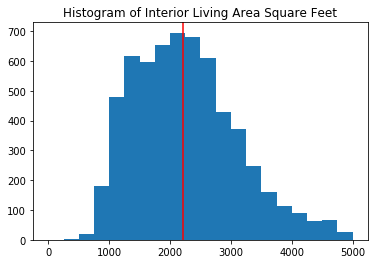

In [249]:
fig = plt.figure()
ax = merge_ADU_zones['Interior_LivingArea'].hist(bins = 20, range = [0,5000])
ax.grid(False)
plt.axvline(x=2205.0,color='red')

plt.title("Histogram of Interior Living Area Square Feet")
plt.show()

In [225]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

crs = {'init': 'epsg:4326'}
gdf_merged = GeoDataFrame(merge_ADU_zones, crs=crs, geometry=merge_ADU_zones['geometry'])


In [338]:
print("Original:")
print(len(merge_ADU_zones.loc[merge_ADU_zones['ADU Original Flag']==1]))
print(len(merge_ADU_zones.loc[merge_ADU_zones['ADU Original Flag']==0]))
print("\nNew:")
print(len(merge_ADU_zones.loc[merge_ADU_zones['ADU New']==1]))
print(len(merge_ADU_zones.loc[merge_ADU_zones['ADU New']==0]))

print("\nTotal:")
print(len(merge_ADU_zones))

Original:
1567
4714

New:
4256
2025

Total:
6281


In [318]:
def make_geoplot(df, field, x,label,title):
    ax = gdf_merged_fy20.plot(color='gainsboro', 
                     linewidth=0.5, 
                     figsize=(25,15))

    print(len(df.loc[df[field]==x])," Total Lots Shown")
    df.loc[df[field]==x].plot(
        alpha=0.5, 
        ax=ax, 
        column=field,
        label = label)

    ax.axis('off')
    plt.title(title,
                fontsize=28)
    plt.show()

1567  Total Lots Shown


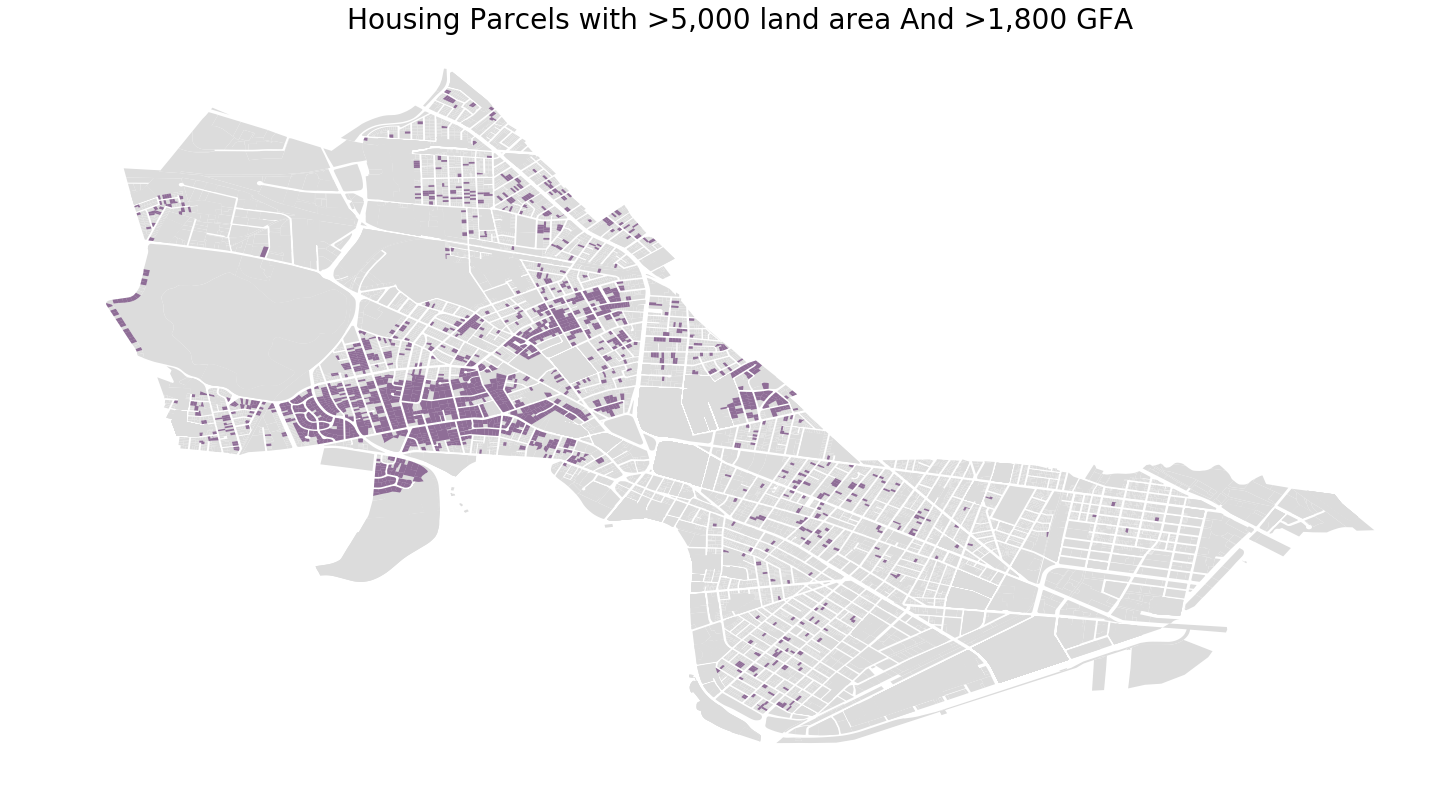

In [319]:
make_geoplot(gdf_merged,'ADU Original Flag',
            1,'Originally Acceptable',
            'Housing Parcels with >5,000 land area And >1,800 GFA')

4714  Total Lots Shown


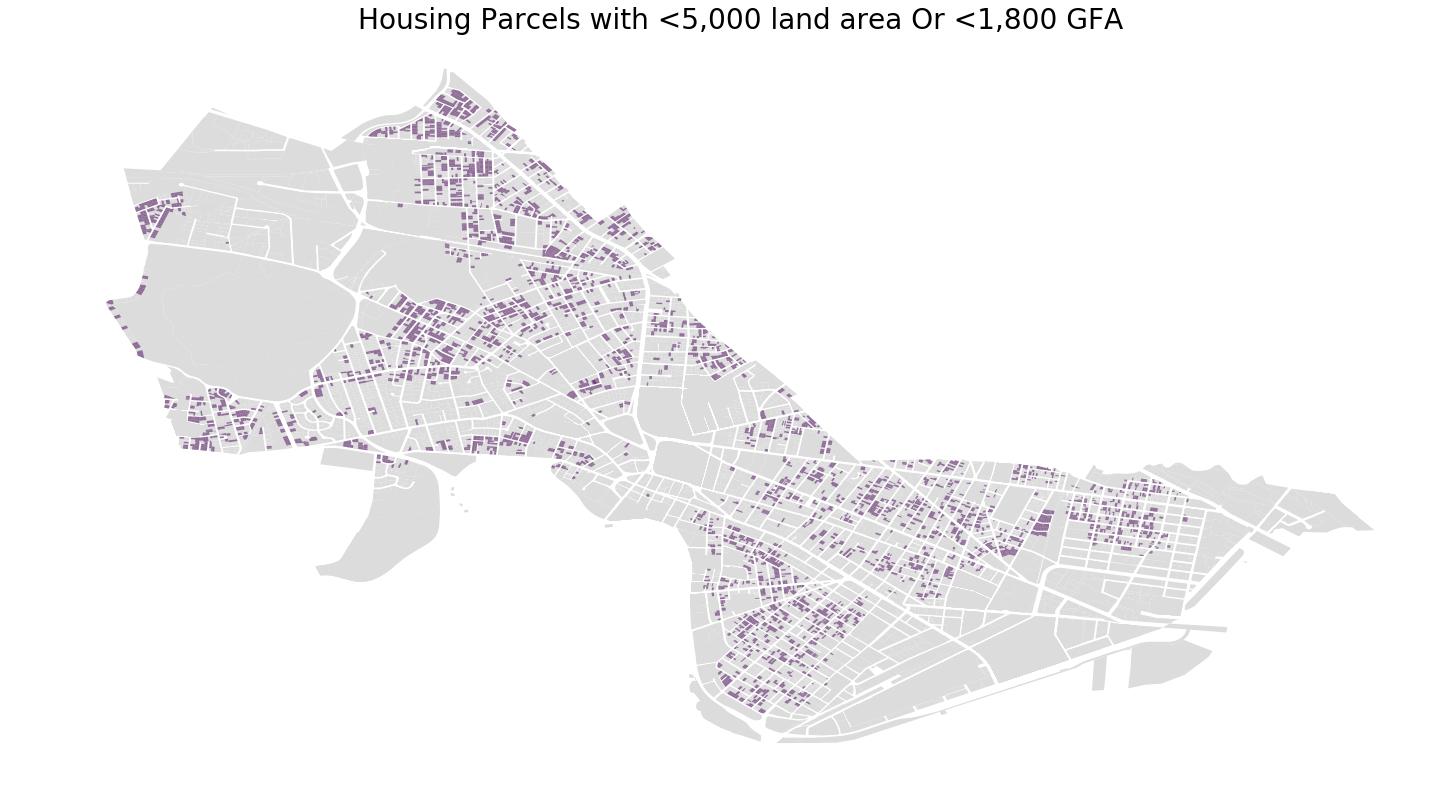

In [320]:
make_geoplot(gdf_merged,'ADU Original Flag',
            0,'Originally Acceptable',
            'Housing Parcels with <5,000 land area Or <1,800 GFA')

4256  Total Lots Shown


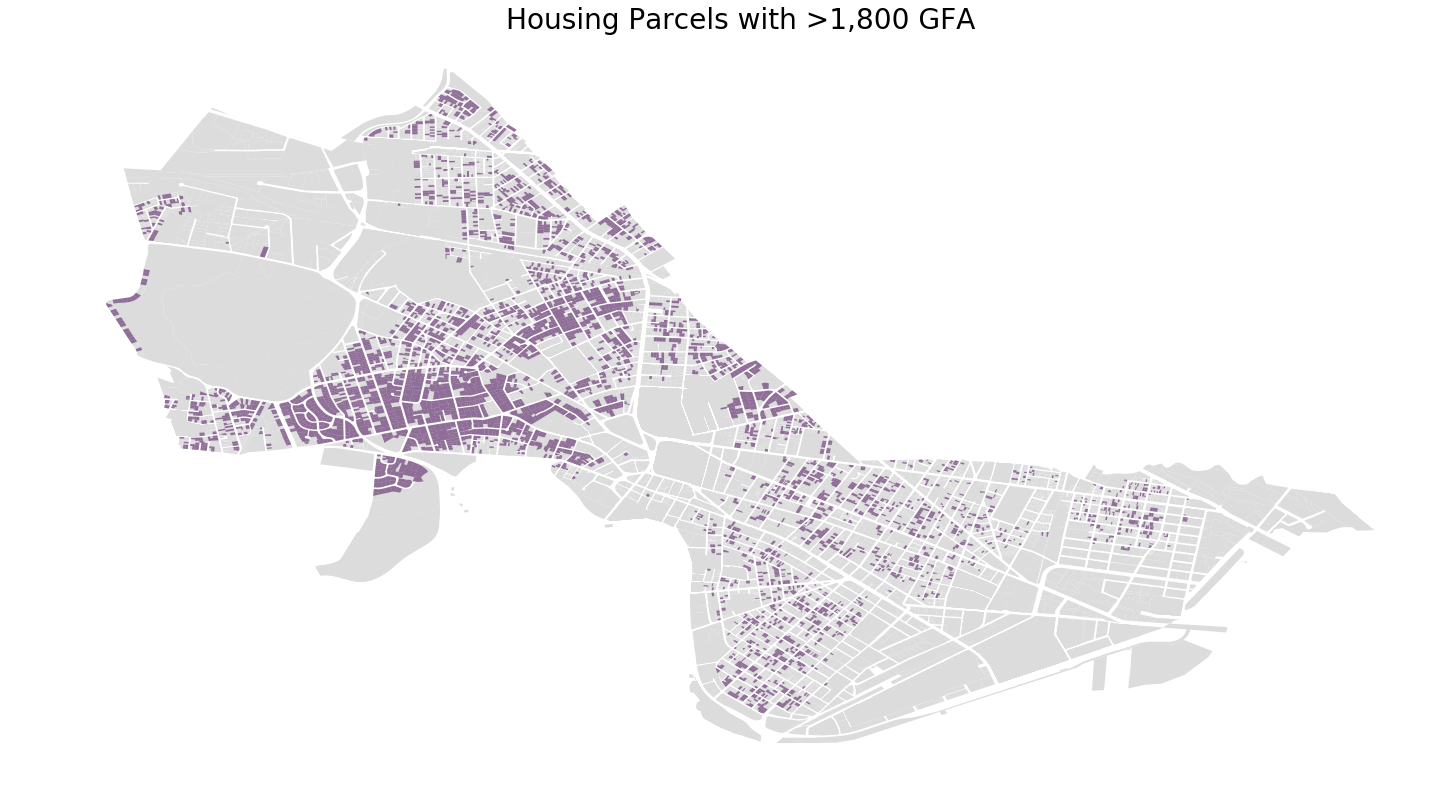

In [321]:
make_geoplot(gdf_merged,'ADU New',
            1,'Now Acceptable',
            'Housing Parcels with >1,800 GFA')

2025  Total Lots Shown


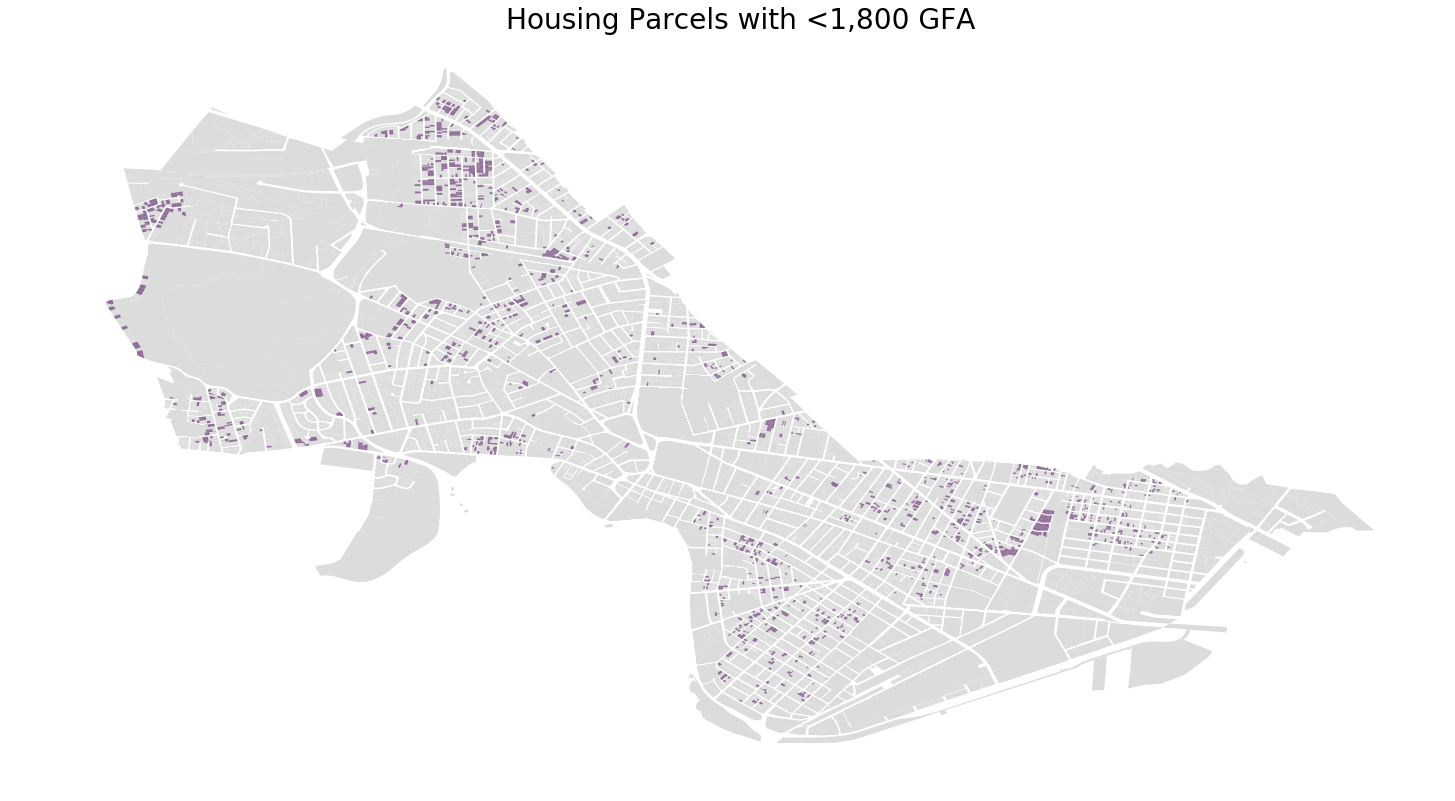

In [322]:
make_geoplot(gdf_merged,'ADU New',
            0,'Now Inelgibile',
            'Housing Parcels with <1,800 GFA')

In [226]:
## Filter for single family homes
gdf_merged_singles = gdf_merged.loc[gdf_merged['PropertyClass']=="SNGL-FAM-RES"]


1969  Total Lots Shown


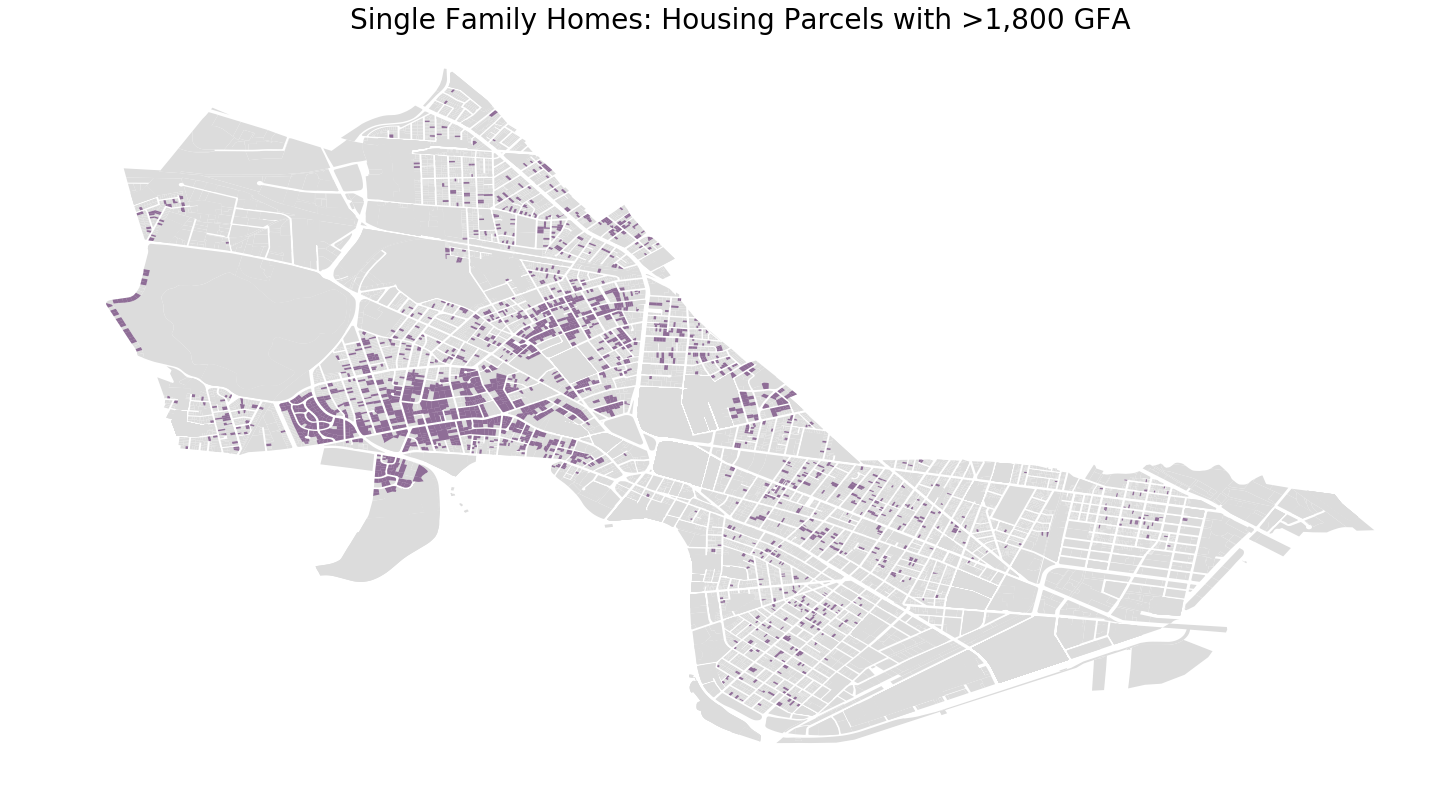

In [339]:
make_geoplot(gdf_merged_singles,'ADU New',
            1,'Now Acceptable',
            'Single Family Homes: Housing Parcels with >1,800 GFA')